# Comparing Reddit Comment Scores Based on Religious Text

This is a graph looking at the avereage comment score on Reddit for comments that mention words associated with Christianity, Judaism, Islam, or General Religion. 
In general, comments with text regarding Judaism perform worse if they are positive and the overall sentiment has no effect
on comments regarding Christianity.

In [ ]:
#First we need to get comments
#Note I have already done this and removed my reddit username and password
import pandas as pd
import praw

reddit = praw.Reddit(client_id="",
                     client_secret="",
                     user_agent="Python data scrap for analyses ()",
                     username="",
                     password="!")

comments=[]
subreddit_list = ['Politics', 'worldnews', 'news']
for subreddits in subreddit_list:
    hot = reddit.subreddit(subreddits).top(limit=100, time_filter='month')
    sub = subreddits
    for submission in hot:
        print(submission.title)
        submission.comments.replace_more(limit=10)
        for comment in submission.comments.list():
            if type(comment.parent()) == praw.models.reddit.submission.Submission:
                comment.parent().body = 'NaN'
                comment.parent().score = 'NaN'
            comments.append([sub, submission.title, comment.author, comment.score, comment.body, comment.created_utc, comment.parent().body, comment.parent().score])
        
        

In [12]:
#Import the dataset
import pandas as pd
df = pd.read_csv('C:/Users/Pablo/Documents/Data Challenges/Reddit/Datasets/politics_comments.csv')

In [13]:
#Lets define some religious text (non extensive of course)
christian_text = ('god|christian|jesus|faith|church|catholic|protestant|evangelical|christ|lord|baptist|orthodox|worship|bible|lutheran')
judiasm_text = ('judaism|jew|isreal|holocaust|hebrew|passover|synagogue|yiddish|jewish|isrealite|hannukah|yom kippur')
islam_text = ('muslim|sunni|islam|islamic|arabic|islamist|muhammad|shiite')
#now, create a variable in the data set for mentions of the text. 
#The text column is the one of interest
df['christian_text'] = df['body'].str.contains(christian_text, case = False)
df['judiasm_text'] = df['body'].str.contains(judiasm_text, case = False)
df['islam_text'] = df['body'].str.contains(islam_text, case = False)
df['religion_text'] = df['body'].str.contains('religion', case = False)

# Conduct sentiment analyses on the comments 

In [ ]:
#conduct sentiment analyses on the comments 
#This takes a while so I will have a df ready in the next cell

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
df = pd.read_csv('C:/Users/dsmit/Documents/Data Challenges/Reddit/Datasets/comments_processed.csv')
#Our goal here is to conduct sentiment analyses of the comments
df = df.dropna(subset=['body'])
sid = SentimentIntensityAnalyzer()
df2 = pd.DataFrame()


for i in df['body']:
    scores = sid.polarity_scores(i)

    #for key in sorted(scores):
        #print('{0}: {1} '.format(key, scores[key]), end='')

    if scores["compound"] >= 0.05:
        df2.loc[i,'sentiment1'] = 'positive'

    elif scores["compound"] <= -0.05:
        df2.loc[i,'sentiment1'] = 'negative'
    else:
        df2.loc[i,'sentiment1'] = 'neutral'
 
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)      
df = pd.concat([df, df2], axis=1)

# Adjust the dataset so we can plot

In [9]:
import pandas as pd

df = pd.read_csv('C:/Users\Pablo\Documents\Data Challenges\Reddit\Datasets\comments_processed_sentiment.csv')

#try to plot it 
dfreligion = df[['score', 'christian_text', 'judiasm_text', 'islam_text', 'religion_text', 'sentiment1']]

dfreligion.loc[dfreligion['christian_text'] == True, 'christian_text'] = dfreligion['score']
dfreligion.loc[dfreligion['judiasm_text'] == True, 'judiasm_text'] = dfreligion['score']
dfreligion.loc[dfreligion['islam_text'] == True, 'islam_text'] = dfreligion['score']
dfreligion.loc[dfreligion['religion_text'] == True, 'religion_text'] = dfreligion['score']

dfreligion = dfreligion[['christian_text', 'judiasm_text', 'islam_text', 'religion_text', 'sentiment1']]
dfreligionlong = pd.melt(dfreligion, id_vars=['sentiment1'], var_name = 'group',  value_name = 'score')
dfreligionlong = dfreligionlong[dfreligionlong.score != False]
dfreligionlong['score'] = dfreligionlong.score.astype(float)

#now we  (I'm not sure these numbers add up tbh but whatever)
gr = dfreligionlong.groupby(['group', 'sentiment1'])['score'].aggregate(['mean','sem'])


# Plot

[Text(0, 0, 'Christianity'),
 Text(0, 0, 'Judaism'),
 Text(0, 0, 'Islam'),
 Text(0, 0, 'General Religion')]

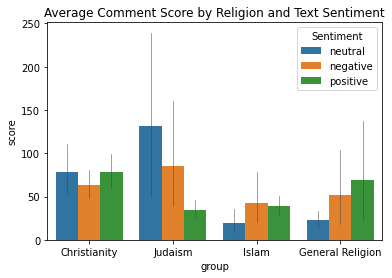

In [10]:
import seaborn as sns
g = sns.barplot(data = dfreligionlong, ci = 95, errwidth=.5
            ,x = 'group'
            ,y = 'score', hue = 'sentiment1',
            )
plt.title("Average Comment Score by Religion and Text Sentiment")
plt.legend(title = 'Sentiment')
g.set_xticklabels(['Christianity','Judaism','Islam', 'General Religion'])